In [1]:
import pandas as pd
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display
from glob import glob
from keras.utils import to_categorical
from keras import regularizers
dsize = (80,80)

# Listing and converting to arrays

In [2]:
listofimg = glob('flowers\daisy/*.JPG', recursive=True)
data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)
daisy=np.array(data)
daisytrain=daisy[0:613,:]
daisytest=daisy[613:770,:]

In [3]:
listofimg = glob('flowers\dandelion/*.JPG', recursive=True)

data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)

dandi=np.array(data)
dandi.shape

danditrain=dandi[0:842,:]
danditest=dandi[842:1053,:]

daisytrain.shape

dandi.shape

(1052, 80, 80)

In [4]:
listofimg = glob('flowers/rose/*.JPG',recursive=True)
data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)
rose=np.array(data)
rose.shape
rosetrain=rose[0:628,:]
rosetest=rose[628:785,:]

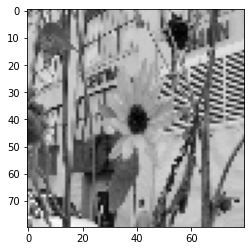

In [5]:
listofimg = glob('flowers/sunflower/*.JPG',recursive=True)

data =[]

for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)

sun=np.array(data)
sun.shape

suntrain=sun[0:587,:]
suntest=sun[587:735,:]

plt.imshow(suntrain[586],cmap='gray')

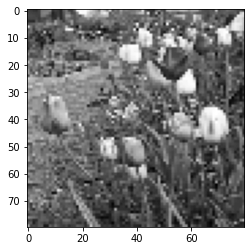

In [6]:
listofimg = glob('flowers/tulip/*.JPG',recursive=True)

data =[]
for images in listofimg:
    image = cv2.imread (images)
    image1=cv2.resize(image, dsize)
    c=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    data.append(c)

tul=np.array(data)
tul.shape

tultrain=tul[0:788,:]
tultest=tul[788:985,:]

pp=tultrain[782]
plt.imshow(pp,cmap='gray')

# Trainlabels

In [7]:
daisylab=np.zeros((daisy.shape[0],1))
dandlab=np.ones((dandi.shape[0],1))
roslab=np.ones((rose.shape[0],1))*2
sunlab=np.ones((sun.shape[0],1))*3
tullab=np.ones((tul.shape[0],1))*4

img_label=np.append(daisylab,dandlab,axis=0)
img_label2=np.append(img_label,roslab,axis=0)
img_label3=np.append(img_label2,sunlab,axis=0)
total_label=np.append(img_label3,tullab,axis=0)
total_label.size

4323

# Append pics

In [8]:
imgt=np.append(daisy,dandi,axis=0)
imgt1=np.append(imgt,rose,axis=0)
imgt2=np.append(imgt1,sun,axis=0)
totalimg=np.append(imgt2,tul,axis=0)
totalimg[0]

array([[139, 147, 150, ..., 160, 153, 154],
       [136, 145, 149, ..., 157, 155, 151],
       [130, 138, 151, ..., 156, 154, 146],
       ...,
       [ 40,  41,  46, ..., 125, 123, 126],
       [ 43,  43,  46, ..., 129, 126, 126],
       [ 44,  45,  48, ..., 132, 129, 127]], dtype=uint8)

# Randomize

In [9]:
np.random.seed(100)
shuf=np.random.randint(0,totalimg.shape[0],totalimg.shape[0]) 
shuf
totalimg=totalimg[shuf]
total_label=total_label[shuf]
one_hot_encode_label_test = to_categorical(total_label)
display(one_hot_encode_label_test)

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

i=120
plt.imshow(totalimg[i])
display(total_label[i])

# Normalize 

In [10]:

train_images = totalimg.reshape((totalimg.shape[0], dsize[0] * dsize[1]))
train_images = train_images.astype('float32') / 255
train_images.max()

1.0

# splitting data

In [11]:
import sklearn.model_selection as model_selection

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_images,one_hot_encode_label_test, train_size=0.60,test_size=0.40)
X_train1, X_val, y_train1, y_val = model_selection.train_test_split(X_train,y_train, train_size=0.8,test_size=0.20)

In [13]:
X_train.shape
X_val.shape

(519, 6400)

# Network structure

In [14]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(100, activation='relu',input_shape=(dsize[0] * dsize[1],)))
network.add(layers.Dense(80, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(80, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(5, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Network Training

In [16]:
history = network.fit(X_train1,y_train1,epochs=300,batch_size=50,validation_data=(X_val, y_val))

Epoch 1/300
42/42 [==============================] - 2s 43ms/step - loss: 1.7268 - accuracy: 0.2454 - val_loss: 1.5874 - val_accuracy: 0.2428
Epoch 2/300
42/42 [==============================] - 1s 25ms/step - loss: 1.5916 - accuracy: 0.2546 - val_loss: 1.5654 - val_accuracy: 0.2909
Epoch 3/300
42/42 [==============================] - 1s 25ms/step - loss: 1.5626 - accuracy: 0.2777 - val_loss: 1.5746 - val_accuracy: 0.2948
Epoch 4/300
42/42 [==============================] - 1s 25ms/step - loss: 1.5446 - accuracy: 0.2917 - val_loss: 1.5482 - val_accuracy: 0.2909
Epoch 5/300
42/42 [==============================] - 1s 24ms/step - loss: 1.5346 - accuracy: 0.2994 - val_loss: 1.5623 - val_accuracy: 0.3006
Epoch 6/300
42/42 [==============================] - 1s 27ms/step - loss: 1.5289 - accuracy: 0.3052 - val_loss: 1.6248 - val_accuracy: 0.2678
Epoch 7/300
42/42 [==============================] - 1s 25ms/step - loss: 1.5154 - accuracy: 0.3182 - val_loss: 1.5371 - val_accuracy: 0.2948
Epoch 

42/42 [==============================] - 1s 24ms/step - loss: 1.0733 - accuracy: 0.5550 - val_loss: 1.7429 - val_accuracy: 0.3565
Epoch 59/300
42/42 [==============================] - 1s 25ms/step - loss: 1.0908 - accuracy: 0.5579 - val_loss: 1.6113 - val_accuracy: 0.4123
Epoch 60/300
42/42 [==============================] - 1s 25ms/step - loss: 1.0752 - accuracy: 0.5632 - val_loss: 1.7755 - val_accuracy: 0.3314
Epoch 61/300
42/42 [==============================] - 1s 24ms/step - loss: 1.1082 - accuracy: 0.5617 - val_loss: 1.6605 - val_accuracy: 0.3353
Epoch 62/300
42/42 [==============================] - 1s 25ms/step - loss: 1.0229 - accuracy: 0.5776 - val_loss: 1.9139 - val_accuracy: 0.2678
Epoch 63/300
42/42 [==============================] - 1s 24ms/step - loss: 1.0493 - accuracy: 0.5767 - val_loss: 2.0538 - val_accuracy: 0.3295- loss: 1.0493 - accuracy: 0.57
Epoch 64/300
42/42 [==============================] - 1s 23ms/step - loss: 1.0648 - accuracy: 0.5699 - val_loss: 1.8361 - va

Epoch 115/300
42/42 [==============================] - 1s 23ms/step - loss: 0.9067 - accuracy: 0.6654 - val_loss: 1.9407 - val_accuracy: 0.4355
Epoch 116/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7969 - accuracy: 0.6871 - val_loss: 4.7298 - val_accuracy: 0.2312 0s - loss: 0.8227 - accuracy: 
Epoch 117/300
42/42 [==============================] - 1s 24ms/step - loss: 0.8874 - accuracy: 0.6591 - val_loss: 2.2388 - val_accuracy: 0.3314
Epoch 118/300
42/42 [==============================] - 1s 24ms/step - loss: 0.8696 - accuracy: 0.6591 - val_loss: 2.3744 - val_accuracy: 0.3661
Epoch 119/300
42/42 [==============================] - 1s 23ms/step - loss: 0.8588 - accuracy: 0.6808 - val_loss: 2.4667 - val_accuracy: 0.4181
Epoch 120/300
42/42 [==============================] - 1s 25ms/step - loss: 0.8981 - accuracy: 0.6615 - val_loss: 3.9549 - val_accuracy: 0.3141
Epoch 121/300
42/42 [==============================] - 1s 25ms/step - loss: 0.8722 - accuracy: 0.6779 - v

42/42 [==============================] - 1s 23ms/step - loss: 0.7392 - accuracy: 0.7348 - val_loss: 3.0512 - val_accuracy: 0.4008
Epoch 172/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7559 - accuracy: 0.7382 - val_loss: 1.9512 - val_accuracy: 0.4393
Epoch 173/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7009 - accuracy: 0.7628 - val_loss: 3.4559 - val_accuracy: 0.3256
Epoch 174/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7900 - accuracy: 0.7208 - val_loss: 2.4851 - val_accuracy: 0.3507
Epoch 175/300
42/42 [==============================] - 1s 24ms/step - loss: 0.6885 - accuracy: 0.7435 - val_loss: 1.8416 - val_accuracy: 0.4008
Epoch 176/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7303 - accuracy: 0.7382 - val_loss: 1.9781 - val_accuracy: 0.4374
Epoch 177/300
42/42 [==============================] - 1s 23ms/step - loss: 0.7309 - accuracy: 0.7469 - val_loss: 1.8329 - val_accuracy: 0.3950
Epoch 

Epoch 228/300
42/42 [==============================] - 1s 22ms/step - loss: 0.8020 - accuracy: 0.7507 - val_loss: 2.5936 - val_accuracy: 0.3507
Epoch 229/300
42/42 [==============================] - 1s 22ms/step - loss: 0.5476 - accuracy: 0.8067 - val_loss: 1.9882 - val_accuracy: 0.4644
Epoch 230/300
42/42 [==============================] - 1s 22ms/step - loss: 0.5777 - accuracy: 0.7907 - val_loss: 2.7506 - val_accuracy: 0.3969
Epoch 231/300
42/42 [==============================] - 1s 23ms/step - loss: 0.5884 - accuracy: 0.7893 - val_loss: 2.0095 - val_accuracy: 0.4239
Epoch 232/300
42/42 [==============================] - 1s 25ms/step - loss: 0.5561 - accuracy: 0.8091 - val_loss: 2.5458 - val_accuracy: 0.3950
Epoch 233/300
42/42 [==============================] - 1s 28ms/step - loss: 0.5485 - accuracy: 0.7985 - val_loss: 3.4576 - val_accuracy: 0.3545
Epoch 234/300
42/42 [==============================] - 1s 28ms/step - loss: 0.5919 - accuracy: 0.8047 - val_loss: 2.6106 - val_accuracy:

42/42 [==============================] - 1s 27ms/step - loss: 0.5336 - accuracy: 0.8361 - val_loss: 2.2183 - val_accuracy: 0.4605
Epoch 285/300
42/42 [==============================] - 1s 27ms/step - loss: 0.5239 - accuracy: 0.8279 - val_loss: 3.3285 - val_accuracy: 0.3410
Epoch 286/300
42/42 [==============================] - 1s 27ms/step - loss: 0.4723 - accuracy: 0.8351 - val_loss: 2.7992 - val_accuracy: 0.4701
Epoch 287/300
42/42 [==============================] - 1s 26ms/step - loss: 0.6442 - accuracy: 0.8510 - val_loss: 2.3592 - val_accuracy: 0.4297
Epoch 288/300
42/42 [==============================] - 1s 32ms/step - loss: 0.4880 - accuracy: 0.8539 - val_loss: 3.1077 - val_accuracy: 0.3776
Epoch 289/300
42/42 [==============================] - 1s 29ms/step - loss: 0.5768 - accuracy: 0.8230 - val_loss: 2.6223 - val_accuracy: 0.4566
Epoch 290/300
42/42 [==============================] - 1s 23ms/step - loss: 0.5861 - accuracy: 0.8308 - val_loss: 2.2730 - val_accuracy: 0.4817
Epoch 

# Network evaluate 

In [17]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 5ms/step - loss: 2.3770 - accuracy: 0.5035


[2.3770439624786377, 0.5034682154655457]

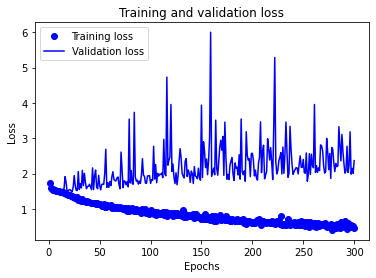

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 300+ 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

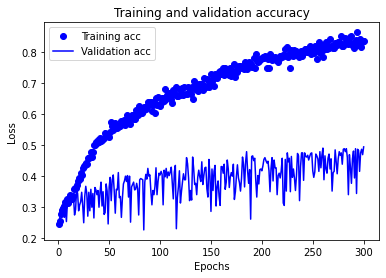

In [19]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()